<a href="https://colab.research.google.com/github/Akshada-Satpute/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Libraries

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme(style="white", palette=None)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from scipy.stats.mstats import winsorize 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Projects/Titanic /titanic.csv')
df.head()

,age,sex,name,pclass,sibsp,parch,ticket,fare,cabin,embarked,survived
0,29.0000,female,"Allen, Miss. Elisabeth Walton",1,0,0,24160,211.3375,B5,S,1
1,0.9167,male,"Allison, Master. Hudson Trevor",1,1,2,113781,151.5500,C22 C26,S,1
2,2.0000,female,"Allison, Miss. Helen Loraine",1,1,2,113781,151.5500,C22 C26,S,0
3,30.0000,male,"Allison, Mr. Hudson Joshua Creighton",1,1,2,113781,151.5500,C22 C26,S,0
4,25.0000,female,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,1,2,113781,151.5500,C22 C26,S,0


## Exploring the Dataset

In [ ]:
df.shape

(1309, 11)

In [ ]:
df.columns.values

array(['age', 'sex', 'name', 'pclass', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'], dtype=object)

In [ ]:
df.describe(include='all')

,age,sex,name,pclass,sibsp,parch,ticket,fare,cabin,embarked,survived
count,1046.000000,1309,1309,1309.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,1309.000000
unique,NaN,2,1307,NaN,NaN,NaN,929,NaN,186,3,NaN
top,NaN,male,"Connolly, Miss. Kate",NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN
freq,NaN,843,2,NaN,NaN,NaN,11,NaN,6,914,NaN
mean,29.881135,NaN,NaN,2.294882,0.498854,0.385027,NaN,33.295479,NaN,NaN,0.381971
std,14.413500,NaN,NaN,0.837836,1.041658,0.865560,NaN,51.758668,NaN,NaN,0.486055
min,0.166700,NaN,NaN,1.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,21.000000,NaN,NaN,2.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000
50%,28.000000,NaN,NaN,3.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,39.000000,NaN,NaN,3.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1046 non-null   float64
 1   sex       1309 non-null   object 
 2   name      1309 non-null   object 
 3   pclass    1309 non-null   int64  
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


## Checking for Null Values

In [ ]:
df.isna().sum()

age          263
sex            0
name           0
pclass         0
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

In [ ]:
df.isnull().mean()*100

age         20.091673
sex          0.000000
name         0.000000
pclass       0.000000
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.076394
cabin       77.463713
embarked     0.152788
survived     0.000000
dtype: float64

**The Age, Cabin, and Embarked columns in the dataset contain null values.**


## Droping Unnecessary Columns

In [ ]:
# Dropping useless columns such as name & ticket
# Dropping the cabin Column because it contains very high number of null values
df = df.drop(['name', 'ticket', 'cabin'], axis = 1)
df.head()

,age,sex,pclass,sibsp,parch,fare,embarked,survived
0,29.0000,female,1,0,0,211.3375,S,1
1,0.9167,male,1,1,2,151.5500,S,1
2,2.0000,female,1,1,2,151.5500,S,0
3,30.0000,male,1,1,2,151.5500,S,0
4,25.0000,female,1,1,2,151.5500,S,0


# Feature Transformation

## Handling Missing Values

### Numeric Features

**If the data is missing less than 5 % then we replace it by using mean and median.**
- Mean(When data is normally distributed)
- Median(When data is skewed)

**Age Column**

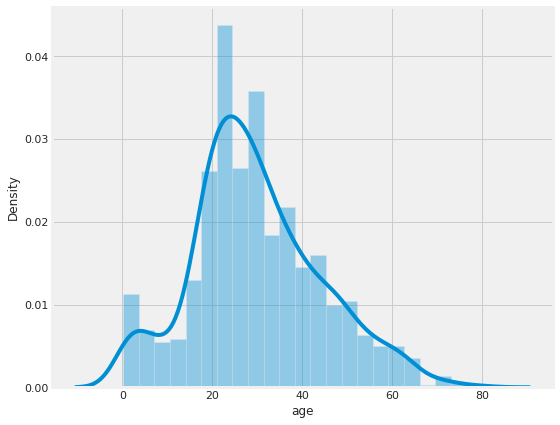

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))
sns.distplot(df.age);

In [ ]:
#Filling Age column by mean
df['age'].fillna(df['age'].mean(), inplace = True)

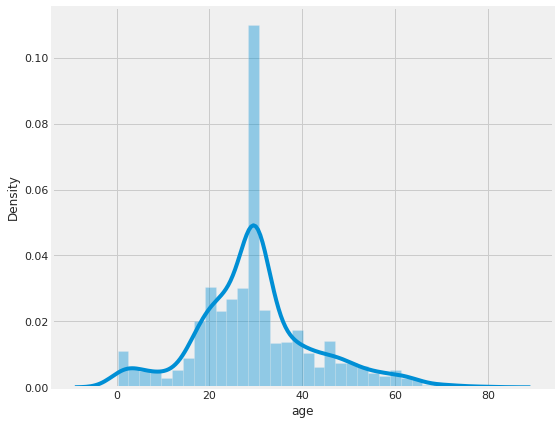

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))
sns.distplot(df.age);

**Fare Column**

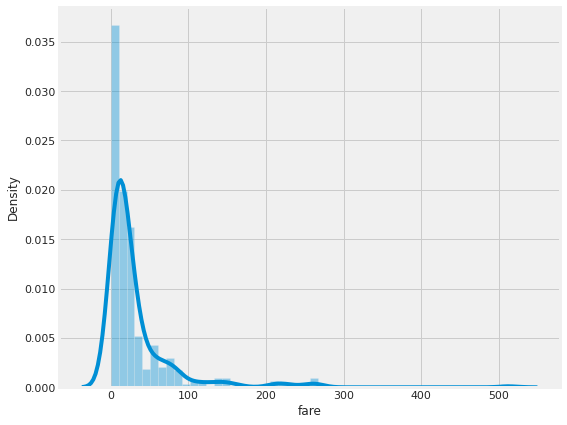

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))
sns.distplot(df.fare);

In [ ]:
#Filling fare column by mean
df['fare'].fillna(df['fare'].median(), inplace = True)

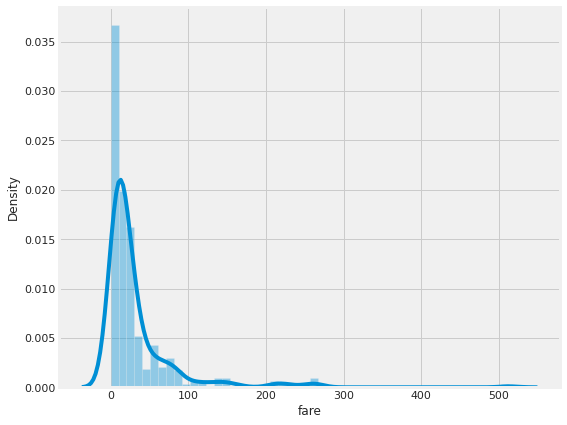

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))
sns.distplot(df.fare);

### Categorical Feature

**If the data is missing less than 5 % then we replace it by using mode.**

- most frequent value
- new categorie (missing) > 10% missing values

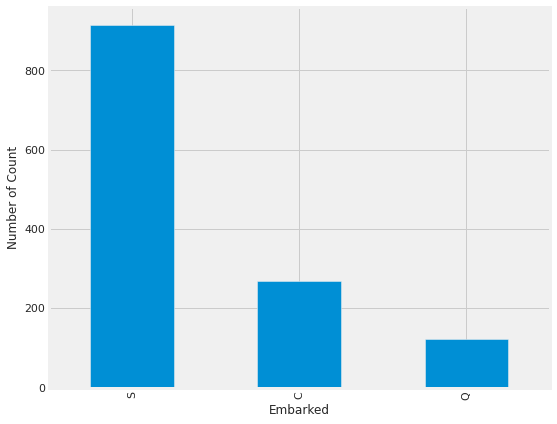

In [ ]:
# Filling embarked column by mode
fig, ax = plt.subplots(figsize=(8,7))
df['embarked'].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel('Embarked')
plt.ylabel('Number of Count');

In [ ]:
df['embarked'].mode()

0    S
dtype: object

In [ ]:
df['embarked'].fillna('S', inplace = True)

In [ ]:
df.isna().sum()

age         0
sex         0
pclass      0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64

## Dealing with Outliers 

**As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.**

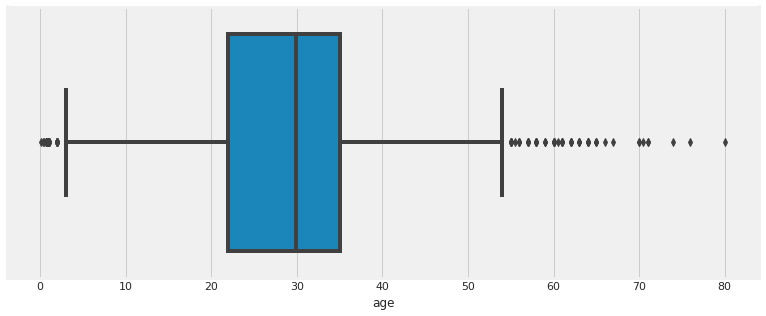

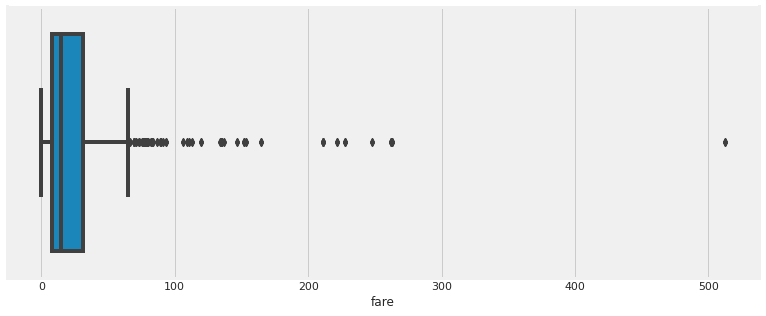

In [ ]:
df1 = ['age', 'fare']
for i in df1:
    fig = plt.figure(figsize=(12,5))
    sns.boxplot(df[i])
    fig.show()

In [ ]:
#Age Column

for i in df['age']:
  q1 = df['age'].quantile(0.25)
  q3 = df['age'].quantile(0.75)
  iqr = q3-q1
  lower_tail = q1 - 1.5 * iqr
  upper_tail = q3 + 1.5 * iqr
  if i > upper_tail  or i < lower_tail:
    df['age'] = df['age'].replace(i, 0)

In [ ]:
#Fare Column

q1 = df.fare.quantile(0.25)
q3 = df.fare.quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

df['fare'] = winsorize(df['fare'], limits = (0, 0.15))

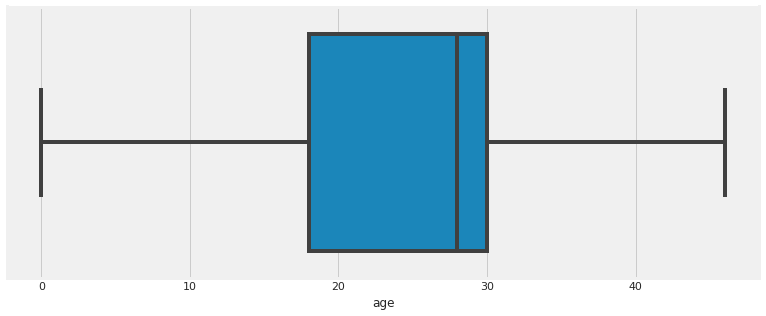

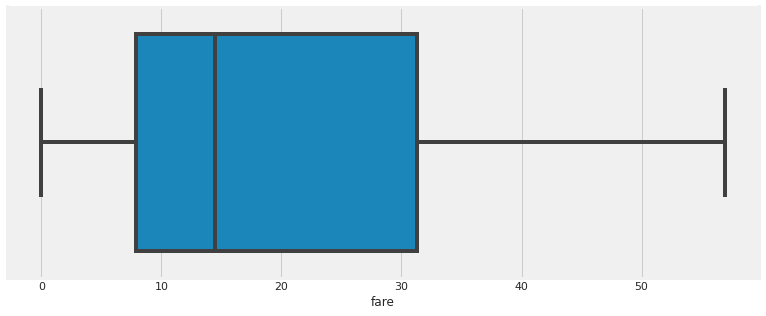

In [ ]:
df1 = ['age', 'fare']
for i in df1:
    fig = plt.figure(figsize=(12,5))
    sns.boxplot(df[i])
    fig.show()

**Now, there is no outliers prasent in dataset.**

# Visualization

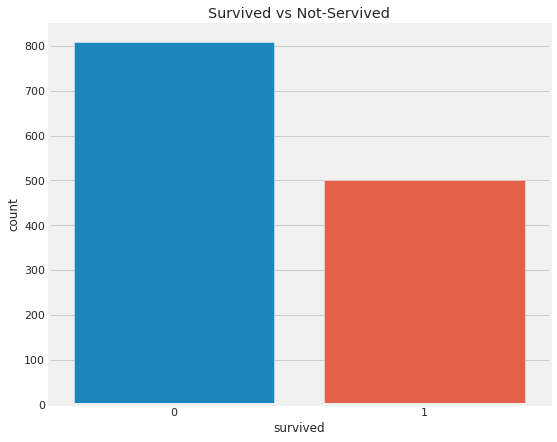

In [ ]:
#Servive

fig, ax = plt.subplots(figsize=(8,7))
sns.countplot(df['survived'])
plt.title('Survived vs Not-Servived');

In [ ]:
df.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

**339 females survived out of 466 and out of 843 males 161 survived. The survival ratio of females is much greater than males.**


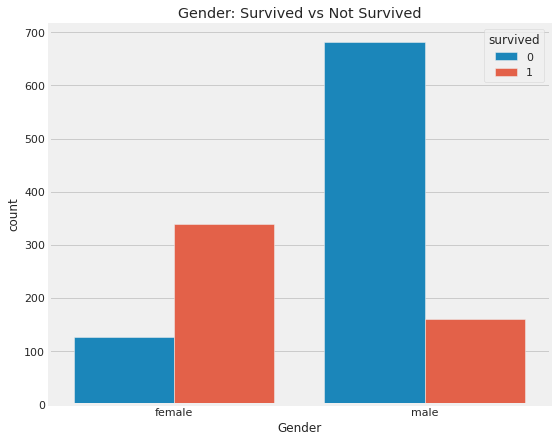

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))
sns.countplot('sex', hue = 'survived', data = df)
plt.xlabel('Gender')
plt.title('Gender: Survived vs Not Survived')
plt.show()

In [ ]:
df.groupby(['pclass', 'survived'])['survived'].count()

pclass  survived
1       0           123
        1           200
2       0           158
        1           119
3       0           528
        1           181
Name: survived, dtype: int64

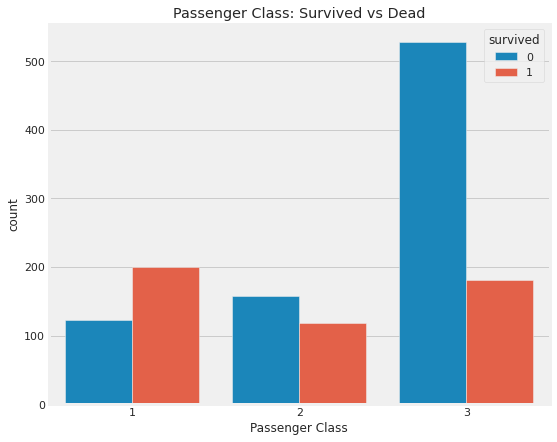

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))
sns.countplot('pclass', hue = 'survived', data = df)
plt.title('Passenger Class: Survived vs Dead')
plt.xlabel('Passenger Class');

## Handling Categorical Variables
### Label Encoding

In [ ]:
df.sex.replace('male', 0, inplace = True)
df.sex.replace('female', 1, inplace = True)

df.embarked.replace('S', 0, inplace = True)
df.embarked.replace('C', 1, inplace = True)
df.embarked.replace('Q', 2, inplace = True)

## Feature Construction

In [ ]:
df['family'] = df['sibsp'] + df['parch']

In [ ]:
df.head()

,age,sex,pclass,sibsp,parch,fare,embarked,survived,family
0,29.0,1,1,0,0,56.9292,0,1,0
1,0.0,0,1,1,2,56.9292,0,1,3
2,0.0,1,1,1,2,56.9292,0,0,3
3,30.0,0,1,1,2,56.9292,0,0,3
4,25.0,1,1,1,2,56.9292,0,0,3


# Prediction 

## Preparing the Data

In [ ]:
x = df.drop(['survived', 'sibsp', 'parch'], axis = 1).values
x

array([[29.    ,  1.    ,  1.    , 56.9292,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  1.    , 56.9292,  0.    ,  3.    ],
       [ 0.    ,  1.    ,  1.    , 56.9292,  0.    ,  3.    ],
       ...,
       [26.5   ,  0.    ,  3.    ,  7.225 ,  1.    ,  0.    ],
       [27.    ,  0.    ,  3.    ,  7.225 ,  1.    ,  0.    ],
       [29.    ,  0.    ,  3.    ,  7.875 ,  0.    ,  0.    ]])

In [ ]:
#the methods to set the feature value range within a similar scale

In [ ]:
y = df['survived'].values
y

array([1, 1, 0, ..., 0, 0, 0])

## Splitting the Data into Traning and Testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(1309, 6) (1047, 6) (262, 6)


## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Logistic Regression Algorithm

In [ ]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.767175572519084

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[126  18]
 [ 43  75]]


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       144
           1       0.81      0.64      0.71       118

    accuracy                           0.77       262
   macro avg       0.78      0.76      0.76       262
weighted avg       0.77      0.77      0.76       262



## Random Forest Algorithm

In [ ]:
model = RandomForestClassifier(n_estimators = 500)  #n_estimator : The number of decision trees in the random forest
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7862595419847328